In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

order_df = pd.read_csv('order_df_sub1.csv')

customer_level =\
order_df.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'total_order_value': 'sum',
    'review_score': 'mean'
})

customer_level.columns = ['num_of_orders', 'customer_total_order_value', 'mean_review_score']

customer_level =\
order_df.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'total_order_value': 'sum',
    'review_score': 'mean'
})

customer_level.columns = ['num_of_orders', 'customer_total_order_value', 'mean_review_score']

customer_level['repeat_customer'] = np.where(customer_level['num_of_orders']>1, 1, 0)

order_df = order_df.merge(customer_level.reset_index(), on='customer_unique_id', how='left')

order_df['lateness'] = order_df['order_to_delivery_dd'] / order_df['order_to_estimated_dd']

In [28]:
order_df.head()

,order_id,order_status,order_ts,delivered_ts,est_delivery_date,payment_type,customer_unique_id,customer_zip_code,customer_city,customer_state,...,order_to_delivery_range_v2,is_same_state,num_seller_states,num_of_orders,customer_total_order_value,mean_review_score,repeat_customer,lateness,actual_delivery_date_bin,estimated_delivery_date_bin
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13,2017-09-20,2017-09-29,credit_card,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,...,< 7.8 days,0,1,1,72.19,5.0,0,0.437500,1. short,2. medium
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26,2017-05-12,2017-05-15,credit_card,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,...,Between 7.8 to 17.3 days,1,1,2,284.56,4.5,1,0.842105,2. medium,3. long
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14,2018-01-22,2018-02-05,credit_card,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,...,Between 7.8 to 17.3 days,1,1,1,216.87,5.0,0,0.363636,2. medium,3. long
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08,2018-08-14,2018-08-20,credit_card,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,...,< 7.8 days,1,1,1,25.78,4.0,0,0.500000,1. short,2. medium
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04,2017-03-01,2017-03-17,credit_card,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,...,> 17.3 days,0,1,1,218.04,5.0,0,0.609756,3. long,3. long


In [29]:
customer_level.head()

,num_of_orders,customer_total_order_value,mean_review_score,repeat_customer
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,5.0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,4.0,0
0000f46a3911fa3c0805444483337064,1,86.22,3.0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,5.0,0


In [2]:
# Average value of customer who does repeat purchase
customer_level[customer_level['repeat_customer']==1]['customer_total_order_value'].mean()

310.3922623434046

In [3]:
# Average value of customer who does only one time purchase
customer_level[customer_level['repeat_customer']==0]['customer_total_order_value'].mean()

160.86768820230284

In [4]:
# Number of customers with repeat purchase
len(customer_level[customer_level['repeat_customer']==1])

2714

In [5]:
# Number of customers with only one-time purchase
len(customer_level[customer_level['repeat_customer']==0])

88814

In [6]:
customer_level['customer_total_order_value'].mean()

165.30141006030237

In [7]:
def order_delivery_bin(row, i):
    lst = [[7.8, 17.3]]
    
    if row[0] < lst[i][0]:
        return "1. short"
    elif row[0] <= lst[i][1]:
        return "2. medium"
    else:
        return "3. long"
    
order_df['actual_delivery_date_bin'] = order_df[['order_to_delivery_dd']]\
                                            .apply(lambda x: order_delivery_bin(x, 0), axis=1)    

order_df['estimated_delivery_date_bin'] = order_df[['order_to_estimated_dd']]\
                                            .apply(lambda x: order_delivery_bin(x, 0), axis=1)  

In [8]:

lst3 = ['mean_review_score', 'num_of_orders', 'order_id']
lst4 = ['mean', 'mean', 'count']

lst_of_df = []
    
for i, j in zip(lst3, lst4):
    print(i + ' - ' + j + '\n')

    df = order_df.pivot_table(values = i,
                        index = 'estimated_delivery_date_bin',
                        columns = 'actual_delivery_date_bin',
                        aggfunc = j)
    pprint(df)

    lst_of_df.append(df)

    print('\n\n')

mean_review_score - mean

actual_delivery_date_bin     1. short  2. medium   3. long
estimated_delivery_date_bin                               
1. short                     4.466822   2.917989  2.666667
2. medium                    4.416217   4.138299  2.277877
3. long                      4.383345   4.278880  3.473455



num_of_orders - mean

actual_delivery_date_bin     1. short  2. medium   3. long
estimated_delivery_date_bin                               
1. short                     1.059371   1.063492  1.000000
2. medium                    1.081615   1.057757  1.040925
3. long                      1.076030   1.076622  1.068830



order_id - count

actual_delivery_date_bin     1. short  2. medium  3. long
estimated_delivery_date_bin                              
1. short                          859        126        3
2. medium                       12706       4467      562
3. long                         16112      41372    18335





In [9]:
current_probs = lst_of_df[2] / lst_of_df[2].sum().sum()
current_probs

actual_delivery_date_bin,1. short,2. medium,3. long
estimated_delivery_date_bin,,,
1. short,0.009086,0.001333,0.000032
2. medium,0.134395,0.047249,0.005944
3. long,0.170422,0.437604,0.193935


In [10]:
# Logistic regression: repeat customer on review score
from statsmodels.api import Logit
from statsmodels.tools.tools import add_constant

y = order_df['repeat_customer']
X = order_df[['review_score']]

X = add_constant(X)

logit = Logit(y, X).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.228513
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: repeat_customer  AIC:              43212.2277
Date:               2020-11-19 09:01 BIC:              43231.1413
No. Observations:   94542            Log-Likelihood:   -21604.   
Df Model:           1                LL-Null:          -21610.   
Df Residuals:       94540            LLR p-value:      0.00042154
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.8990   0.0475 -60.9694 0.0000 -2.9922 -2.8058
review_score      0.0379   0.0109   3.4879 0.0005  0.0166  0.0592
=================================================================

"""

In [11]:
beta0 = logit.params[0]
beta1 = logit.params[1]

logit.params

const          -2.899040
review_score    0.037877
dtype: float64

In [12]:
def class_prob(score):
    return np.exp(beta0 + beta1 * score) / (1 + np.exp(beta0 + beta1 * score))

def expected_value(array):
    aov = 165
    recur = 150
    review_scores = np.array(lst_of_df[0])
    penalty1 = 0.05
    penalty2 = 0.10

    return array[0,0] * class_prob(review_scores[0,0]) * recur +\
                array[0,1] * class_prob(review_scores[0,1]) * recur +\
                array[0,2] * class_prob(review_scores[0,2]) * recur +\
                array[1,0] * (class_prob(review_scores[1,0]) * recur - penalty1 * aov) +\
                array[1,1] * class_prob(review_scores[1,1]) * recur +\
                array[1,2] * class_prob(review_scores[1,2]) * recur +\
                array[2,0] * (class_prob(review_scores[2,0]) * recur - penalty2 * aov) +\
                array[2,1] * (class_prob(review_scores[2,1]) * recur - penalty1 * aov) +\
                array[2,2] * class_prob(review_scores[2,2]) * recur

In [13]:
class_prob(4)

0.06022626565912627

In [14]:
# Existing olist expected value

array = np.array(current_probs)

olist = expected_value(array)

In [15]:
np.array(current_probs)

array([[9.08590891e-03, 1.33274100e-03, 3.17319287e-05],
       [1.34395295e-01, 4.72488418e-02, 5.94444797e-03],
       [1.70421612e-01, 4.37604451e-01, 1.93934971e-01]])

### Expected value from prediction models

In [16]:
# Multinomial logit model

array = np.array([[5793, 47, 3102], [392, 995, 4354], [2938, 706, 10036]]).transpose()
array = array/array.sum()

mnl = expected_value(array)
mnl

5.888380941572148

In [17]:
# SVM

array = np.array([[6122, 0, 2820], [580, 0, 5161],[3496, 0, 10184]]).transpose()
array = array/array.sum()

svm = expected_value(array)
svm

5.834672231083154

In [18]:
# Decision tree

array = np.array([[4820, 48, 4074], [237, 1068, 4436], [1673, 807, 11200]]).transpose()
array = array/array.sum()

dtree = expected_value(array)
dtree

5.309991765728322

In [19]:
# Gradient boosting

array = np.array([[5085, 70, 3787], [229, 1207, 4305], [1795, 853, 11032]]).transpose()
array = array/array.sum()

gbm = expected_value(array)
gbm

5.507136221480607

In [20]:
# XG boost

array = np.array([[5166, 61, 3715], [246, 1341, 4154], [1744, 857, 11079]]).transpose()
array = array/array.sum()

xgb = expected_value(array)
xgb

5.595561768856115

In [24]:
# Random forest

array = np.array([[5007, 34, 3901], [222, 998, 4521], [1678, 620, 11382]]).transpose()
array = array/array.sum()

print(array)

rf = expected_value(array)
rf

[[0.17653281 0.0078271  0.05916158]
 [0.00119874 0.03518669 0.02185946]
 [0.13753834 0.15939781 0.40129747]]


5.392893677815634

In [22]:
all_expected_value = pd.DataFrame(np.array([['MNL',mnl],['SVM',svm],['Dtree',dtree],['GBM',gbm],['XGB',xgb],['RF',rf]]),
                   columns=['models', 'expected_value'])
all_expected_value['expected_value'] = all_expected_value['expected_value'].astype(float)

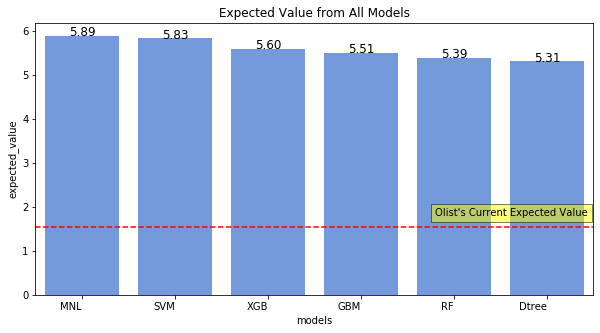

In [23]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center",fontsize=12) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
g = sns.barplot(x='models',y='expected_value',data=all_expected_value, color='cornflowerblue',order=all_expected_value.sort_values(by='expected_value',ascending=False)['models'])
h = plt.axhline(olist,c='red',linestyle='--')

plt.text(3.8,1.8,"Olist's Current Expected Value",bbox=dict(facecolor='yellow', alpha=0.5),rotation=0)

plt.title('Expected Value from All Models')
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(0)
    
show_values_on_bars(ax)